In [1]:
from cobra.io import read_sbml_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from cobra.flux_analysis import single_reaction_deletion

Optionally, we had created Fasting integrated CSM also. Along with E, M and MF CSMs. 

In [2]:
epithelial_csm = read_sbml_model("Epithelial_csm.xml")
epithelial_fasting_csm = read_sbml_model("epithelial_fasting_integrated_csm.xml")

mesenchymal_csm = read_sbml_model("Mesenchymal_csm.xml")
mesenchymal_fasting_csm = read_sbml_model("mesenchymal_fasting_integrated_csm.xml")

We start with checking how flux distributions vary across different context-specific metabolic models integrated with RNA Seq data, facilitating comparative analysis and identification of patterns in metabolic activity.

/var/folders/6x/c19tq81j2954h_g4n73r3lp40000gn/T/ipykernel_24361/3100831581.py:42: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Figure size 1200x1000 with 0 Axes>

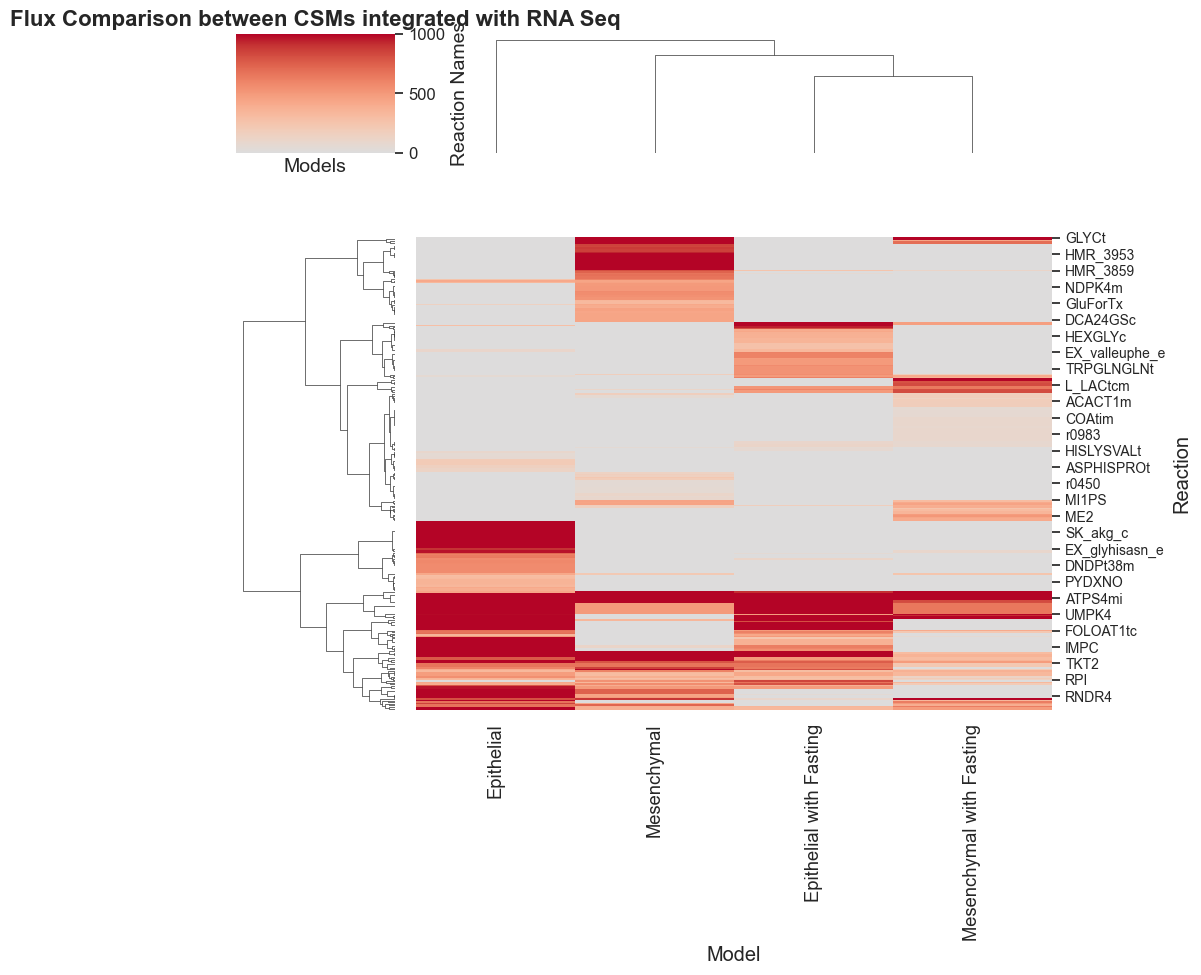

In [95]:
# Load SBML models (assuming this part remains unchanged)
epithelial_csm = read_sbml_model("Epithelial_csm.xml")
epithelial_fasting_csm = read_sbml_model("epithelial_fasting_integrated_csm.xml")
mesenchymal_csm = read_sbml_model("Mesenchymal_csm.xml")
mesenchymal_fasting_csm = read_sbml_model("mesenchymal_fasting_integrated_csm.xml")

# Function to optimize the model and get flux distributions (assuming this part remains unchanged)
def optimize_and_get_fluxes(model):
    solution = model.optimize()
    flux_distribution = solution.fluxes.to_dict()
    return flux_distribution

# Optimize each model to get flux distributions (assuming this part remains unchanged)
epithelial_fluxes = optimize_and_get_fluxes(epithelial_csm)
epithelial_fasting_fluxes = optimize_and_get_fluxes(epithelial_fasting_csm)
mesenchymal_fluxes = optimize_and_get_fluxes(mesenchymal_csm)
mesenchymal_fasting_fluxes = optimize_and_get_fluxes(mesenchymal_fasting_csm)

# Create DataFrames from flux distributions (assuming this part remains unchanged)
df_epithelial = pd.DataFrame(epithelial_fluxes.items(), columns=['Reaction', 'Flux'])
df_epithelial['Model'] = 'Epithelial'

df_epithelial_fasting = pd.DataFrame(epithelial_fasting_fluxes.items(), columns=['Reaction', 'Flux'])
df_epithelial_fasting['Model'] = 'Epithelial with Fasting'

df_mesenchymal = pd.DataFrame(mesenchymal_fluxes.items(), columns=['Reaction', 'Flux'])
df_mesenchymal['Model'] = 'Mesenchymal'

df_mesenchymal_fasting = pd.DataFrame(mesenchymal_fasting_fluxes.items(), columns=['Reaction', 'Flux'])
df_mesenchymal_fasting['Model'] = 'Mesenchymal with Fasting'

# Combine all flux data into a single DataFrame (assuming this part remains unchanged)
df_fluxes = pd.concat([df_epithelial, df_epithelial_fasting, df_mesenchymal, df_mesenchymal_fasting])

# Replace NaN values with zeros in the Flux column (assuming this part remains unchanged)
df_fluxes['Flux'].fillna(0, inplace=True)

# Filter out reactions where Flux is less than 50
df_fluxes = df_fluxes[df_fluxes['Flux'] >= 50]

# If there are enough features (reactions) to create a meaningful heatmap
if df_fluxes.shape[0] >= 2:
    # Set Reaction names as index
    df_fluxes.set_index('Reaction', inplace=True)

    # Create a matrix for heatmap and clustering (assuming this part remains unchanged)
    df_matrix = df_fluxes.pivot(columns='Model', values='Flux')

    # Check for infinite or NaN values in df_matrix and replace them with zeros (assuming this part remains unchanged)
    df_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Compute the linkage matrix for hierarchical clustering (assuming this part remains unchanged)
    Z = linkage(df_matrix, method="ward")

    # Create a heatmap with a dendrogram
    plt.figure(figsize=(12, 10))
    heatmap = sns.clustermap(df_matrix, cmap="coolwarm", method="ward", center=0, cbar_pos=(0.02, 0.8, 0.03, 0.18))

    # Adjust y-axis labels for long reaction names
    ax = heatmap.ax_heatmap
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

    # Set plot title and labels
    plt.title("Flux Comparison between CSMs integrated with RNA Seq", fontsize=16, weight='bold')
    plt.xlabel("Models", fontsize=14)
    plt.ylabel("Reaction Names", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points (reactions) to create a meaningful heatmap.")


We now shortlist amino acids, also refered as Metabolites. And check the flux values of sink reactions. Associted with those metabolites.

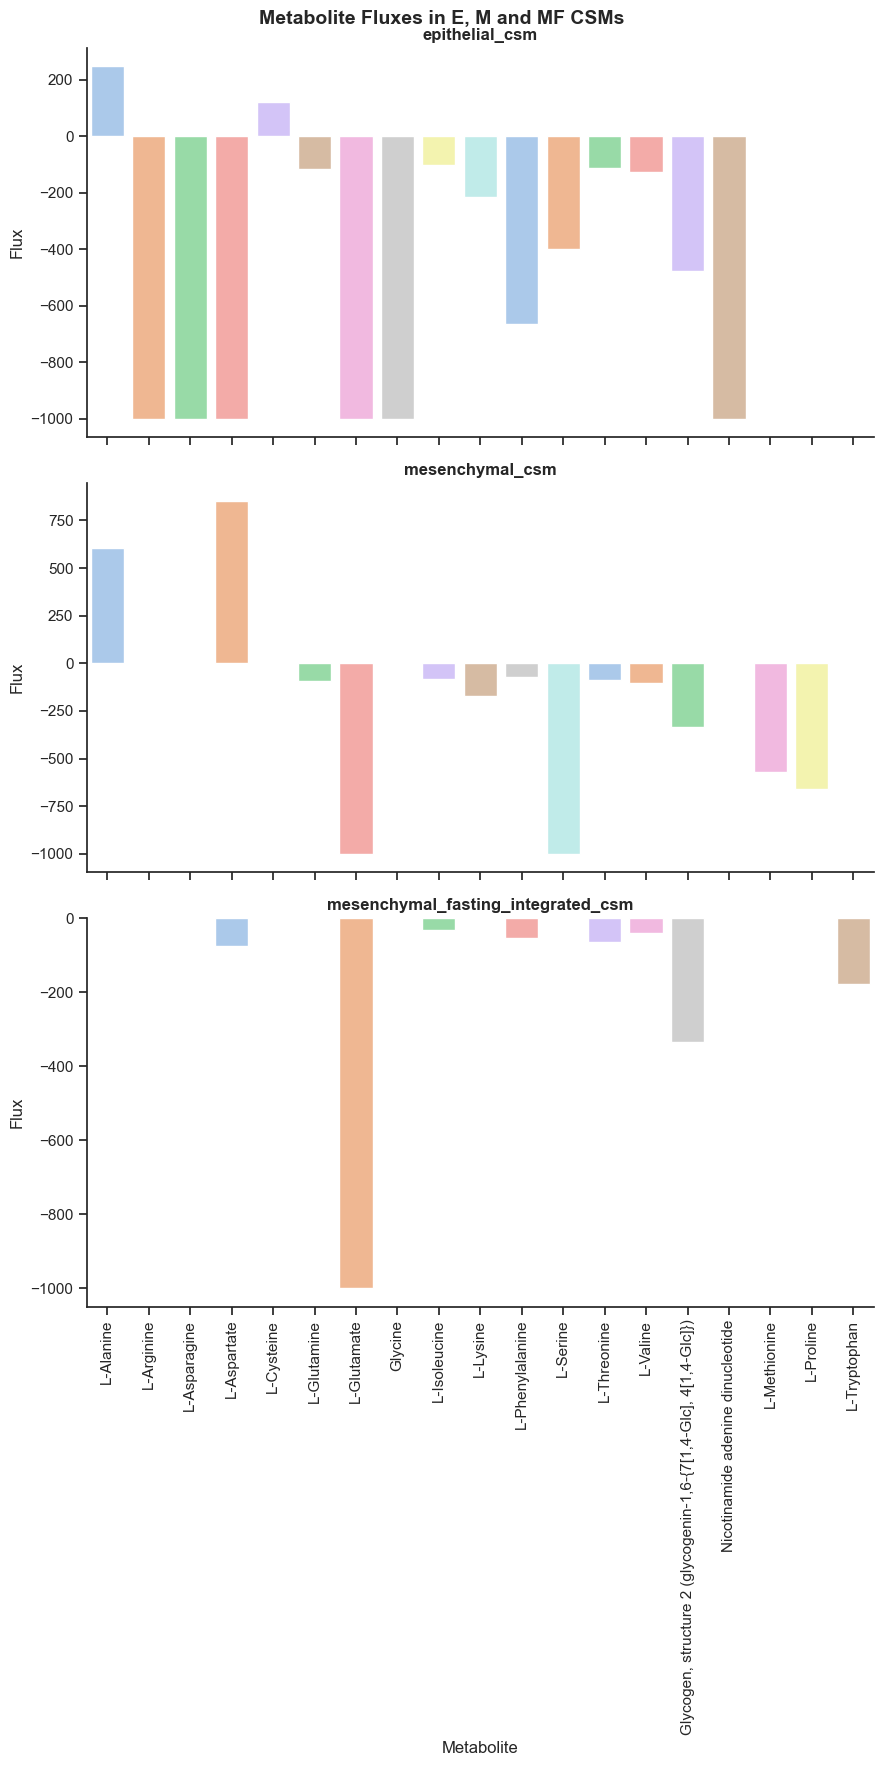

In [3]:
# Assuming your context-specific models are named and have a unique ID
context_specific_models = {
    "epithelial_csm": epithelial_csm,
    "mesenchymal_csm": mesenchymal_csm,
    "mesenchymal_fasting_integrated_csm": mesenchymal_fasting_csm,
}

# List of metabolites of interest
metabolites_of_interest = [
    "ala__L_c",
    "arg__L_c",
    "asn__L_c",
    "asp__L_c",
    "cys__L_c",
    "gln__L_c",
    "glu__L_c",
    "gly_c",
    "his__L_c",
    "ile__L_c",
    "leu__L_c",
    "lys__L_c",
    "met__L_c",
    "phe__L_c",
    "pro__L_c",
    "ser__L_c",
    "thr__L_c",
    "trp__L_c",
    "tyr__L_c",
    "val__L_c",
    "damp_c",
    "dcmp_c",
    "dgmp_c",
    "dtmp_c",
    "cmp_c",
    "gmp_c",
    "ump_c",
    "amp_c",
    "glygn2_c",
    "sphmyln_hs_c",
    "chsterol_c",
    "xolest_hs_c",
    "mag__hs_c",
    "dag_hs_c",
    "pail_hs_c",
    "pe_hs_c",
    "ps_hs_c",
    "pchol_hs_c",
    "lpchol_hs_c",
    "clpn_hs_c",
    "pa_hs_c",
    "hdcea_c",
    "hdca_c",
    "ocdcea_c",
    "ocdca_c",
    "ptrc_c",
    "spmd_c",
    "sprm_c",
    "gthrd_c",
    "nad_c",
    "nadp_c",
    "Q10_c",
    "paps_c",
    "thbpt_c",
    "crn_c",
    "atp_c",
    "adp_c",
    "pi_c",
    "h2o_c",
    "h_c",
]


# Function to extract sink reaction fluxes
def get_sink_fluxes(model, model_name, metabolites):
    sink_fluxes = []
    for met_id in metabolites:
        try:
            met = model.metabolites.get_by_id(met_id)
            for reaction in met.reactions:
                if reaction.id.startswith("SK"):
                    with model:
                        solution = model.optimize()
                        flux = solution.fluxes.get(reaction.id, 0)
                        sink_fluxes.append(
                            {
                                "Metabolite": met.name,
                                "Flux": flux,
                                "Context_Model": model_name,
                            }
                        )
        except KeyError:
            continue
    return sink_fluxes


# Collect sink fluxes for all context-specific models
all_sink_fluxes = []
for model_name, model in context_specific_models.items():
    sink_fluxes = get_sink_fluxes(model, model_name, metabolites_of_interest)
    all_sink_fluxes.extend(sink_fluxes)

# Create a DataFrame from the collected flux data
df = pd.DataFrame(all_sink_fluxes)

# Filter out metabolites with zero flux
df = df[df["Flux"] != 0]

metabolite_names = df[
    "Metabolite"
].unique()  # Use unique metabolite names from filtered DataFrame

# Ensure 'Context_Model' is a categorical variable
if not df.empty and "Context_Model" in df.columns:
    df["Context_Model"] = df["Context_Model"].astype("category")

    # Set seaborn style and palette
    sns.set(style="ticks", palette="colorblind")

    # Create FacetGrid for the faceted bar graphs
    g = sns.FacetGrid(
        df,
        col="Context_Model",
        col_wrap=1,
        sharex=True,
        sharey=False,
        height=6,
        aspect=1.5,
    )

    # Use seaborn's barplot to plot the data with added aesthetics
    g.map_dataframe(
        sns.barplot,
        x="Metabolite",
        y="Flux",
        order=metabolite_names,
        palette="pastel",
        hue="Metabolite",
        legend=False,
    )

    # Set common x-label and y-label with increased font size
    g.set_axis_labels("Metabolite", "Flux", fontsize=12)

    # Set titles for the facets with bold style
    g.set_titles("{col_name}", fontweight="bold")

    # Adjust the layout
    g.fig.subplots_adjust(top=0.9)  # Increase top margin for facet titles

    # Rotate x-axis labels for better readability
    for ax in g.axes.flatten():
        ax.tick_params(axis="x", rotation=90)

    # Add a meaningful title to the plot
    g.fig.suptitle(
        "Metabolite Fluxes in E, M and MF CSMs", fontsize=14, fontweight="bold"
    )

    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Context_Model' column not found in DataFrame or DataFrame is empty.")

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_rel
from plotly.subplots import make_subplots
import plotly.io as pio


# Function to perform FBA and return flux distribution
def get_flux_distribution(model):
    solution = model.optimize()
    return solution.fluxes


# Perform FBA for all three models
epithelial_fluxes = get_flux_distribution(epithelial_csm)
mesenchymal_fluxes = get_flux_distribution(mesenchymal_csm)
mesenchymal_fasting_fluxes = get_flux_distribution(mesenchymal_fasting_csm)


# Retrieve reaction names
def get_reaction_names(model, reaction_ids):
    reaction_names = {}
    for rxn_id in reaction_ids:
        try:
            reaction_names[rxn_id] = model.reactions.get_by_id(rxn_id).name
        except KeyError:
            reaction_names[rxn_id] = "Unknown"
    return reaction_names


# Compare fluxes across all models
def compare_fluxes_multiple(*fluxes):
    common_reactions = set(fluxes[0].index)
    for flux in fluxes[1:]:
        common_reactions &= set(flux.index)

    common_reactions = list(common_reactions)

    flux_comparison = pd.DataFrame(
        {
            "epithelial_flux": epithelial_fluxes[common_reactions],
            "mesenchymal_flux": mesenchymal_fluxes[common_reactions],
            "mesenchymal_fasting_flux": mesenchymal_fasting_fluxes[common_reactions],
        }
    )

    return flux_comparison, common_reactions


flux_comparison, common_reactions = compare_fluxes_multiple(
    epithelial_fluxes, mesenchymal_fluxes, mesenchymal_fasting_fluxes
)

# Get reaction names for common reactions
reaction_names = get_reaction_names(epithelial_csm, common_reactions)

# Map reaction names to the flux comparison DataFrame
flux_comparison["reaction_name"] = flux_comparison.index.map(reaction_names)


# Analyze and visualize significant flux differences
def analyze_flux_differences(flux_comparison, threshold=1e-5):
    differences = pd.DataFrame(
        {
            "E-M": flux_comparison["epithelial_flux"]
            - flux_comparison["mesenchymal_flux"],
            "E-MF": flux_comparison["epithelial_flux"]
            - flux_comparison["mesenchymal_fasting_flux"],
            "M-MF": flux_comparison["mesenchymal_flux"]
            - flux_comparison["mesenchymal_fasting_flux"],
        }
    )

    significant_changes = differences[
        (np.abs(differences["E-M"]) > threshold)
        | (np.abs(differences["E-MF"]) > threshold)
        | (np.abs(differences["M-MF"]) > threshold)
    ]

    significant_changes["reaction_name"] = significant_changes.index.map(reaction_names)

    return significant_changes


# Visualize flux differences with Plotly
def plot_flux_differences_interactive(flux_comparison, top_n=20):
    differences = pd.DataFrame(
        {
            "E-M": flux_comparison["epithelial_flux"]
            - flux_comparison["mesenchymal_flux"],
            "E-MF": flux_comparison["epithelial_flux"]
            - flux_comparison["mesenchymal_fasting_flux"],
            "M-MF": flux_comparison["mesenchymal_flux"]
            - flux_comparison["mesenchymal_fasting_flux"],
        }
    )

    # Sort by the maximum absolute difference and select top N reactions
    differences["max_abs_diff"] = differences.abs().max(axis=1)
    top_changes = differences.sort_values(by="max_abs_diff", ascending=False).head(
        top_n
    )

    # Map reaction names to the top changes DataFrame
    top_changes["reaction_name"] = top_changes.index.map(reaction_names)

    # Create Plotly bar plot
    fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

    fig.add_trace(
        go.Bar(
            x=top_changes["reaction_name"],
            y=top_changes["E-M"],
            name="E-M",
            marker_color="blue",
            text=top_changes["reaction_name"],
            hovertemplate="<b>%{text}</b><br>Difference: %{y:.2f}<extra></extra>",
        ),
        row=1,
        col=1,
    )
    fig.add_trace(
        go.Bar(
            x=top_changes["reaction_name"],
            y=top_changes["E-MF"],
            name="E-MF",
            marker_color="green",
            text=top_changes["reaction_name"],
            hovertemplate="<b>%{text}</b><br>Difference: %{y:.2f}<extra></extra>",
        ),
        row=1,
        col=1,
    )
    fig.add_trace(
        go.Bar(
            x=top_changes["reaction_name"],
            y=top_changes["M-MF"],
            name="M-MF",
            marker_color="red",
            text=top_changes["reaction_name"],
            hovertemplate="<b>%{text}</b><br>Difference: %{y:.2f}<extra></extra>",
        ),
        row=1,
        col=1,
    )

    fig.update_layout(
        title="Top Flux Differences between the Epithelial, Mesenchymal and Fasting Data integrated Mesenchymal CSMs (CSMs integrated from RNA Seq data)",
        xaxis_title="Reaction Names",
        yaxis_title="Flux Difference",
        barmode="group",
        template="plotly_white",
        height=600,
        width=1000,
    )
    fig.show()


# Analyze significant flux differences
significant_changes = analyze_flux_differences(flux_comparison, threshold=0.1)

# Print significant changes
print("Significant Flux Differences:")
print(significant_changes)

# Plot top N flux differences
plot_flux_differences_interactive(flux_comparison, top_n=60)

Significant Flux Differences:
                    E-M         E-MF         M-MF  \
SK_gly_c   -1000.000000 -1000.000000     0.000000   
CITL        -526.398244     0.000000   526.398244   
GLUDym       209.494692   509.439166   299.944474   
EX_ura_e       0.000000   637.780203   637.780203   
UMPK        -717.738986   282.261014  1000.000000   
...                 ...          ...          ...   
H2O2tm       422.129059   354.155449   -67.973610   
CYTK10         0.000000    -7.917308    -7.917308   
AKGICITtm      0.000000  -181.560842  -181.560842   
HMR_2817       0.000000   -86.905342   -86.905342   
FAOXTC122m   -43.584028     0.000000    43.584028   

                                                reaction_name  
SK_gly_c                                          Sink gly[c]  
CITL                                            Citrate lyase  
GLUDym          Glutamate dehydrogenase (NADP), mitochondrial  
EX_ura_e                                      Uracil exchange  
UMPK         

/var/folders/6x/c19tq81j2954h_g4n73r3lp40000gn/T/ipykernel_24361/2496016422.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now we plot the correlation matrix for sink reactions

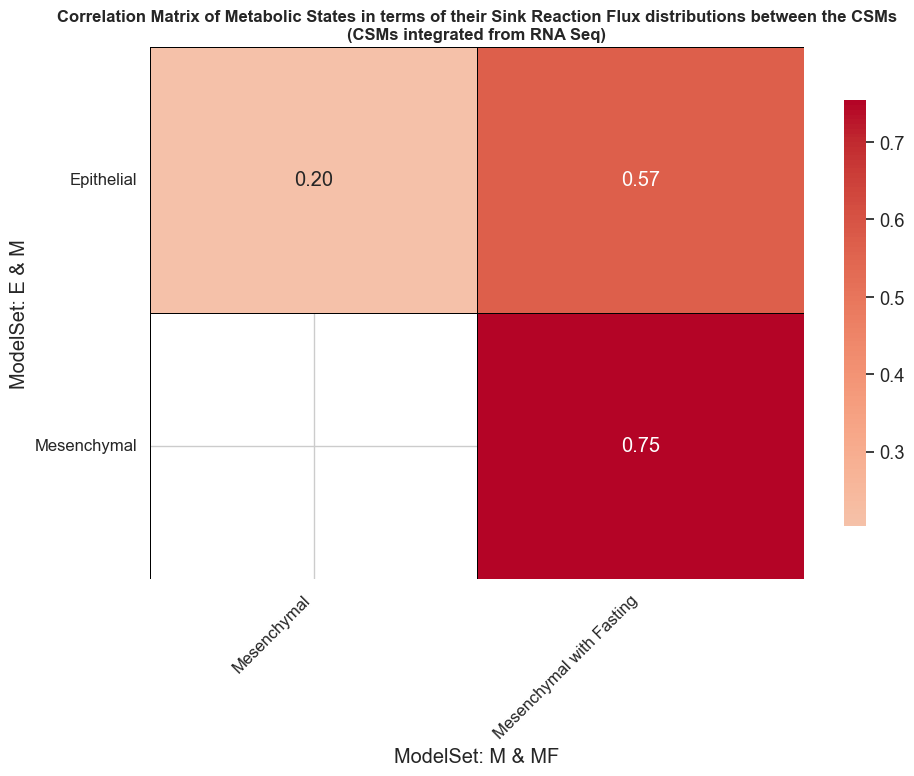

T-Statistics and P-Values:
  ModelSet: E & M          ModelSet: M & MF  T-Statistic   P-Value
0      Epithelial               Mesenchymal    -1.222299  0.249622
1      Epithelial  Mesenchymal with Fasting    -2.009888  0.091169
2     Mesenchymal  Mesenchymal with Fasting     0.803418  0.452378


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_rel

# Assuming your context-specific models are named as follows
context_specific_models = {
    "Epithelial": epithelial_csm,
    "Mesenchymal": mesenchymal_csm,
    "Mesenchymal with Fasting": mesenchymal_fasting_csm,
}

# List of metabolites of interest
metabolites_of_interest = [
    "ala__L_c",
    "arg__L_c",
    "asn__L_c",
    "asp__L_c",
    "cys__L_c",
    "gln__L_c",
    "glu__L_c",
    "gly_c",
    "his__L_c",
    "ile__L_c",
    "leu__L_c",
    "lys__L_c",
    "met__L_c",
    "phe__L_c",
    "pro__L_c",
    "ser__L_c",
    "thr__L_c",
    "trp__L_c",
    "tyr__L_c",
    "val__L_c",
    "damp_c",
    "dcmp_c",
    "dgmp_c",
    "dtmp_c",
    "cmp_c",
    "gmp_c",
    "ump_c",
    "amp_c",
    "glygn2_c",
    "sphmyln_hs_c",
    "chsterol_c",
    "xolest_hs_c",
    "mag__hs_c",
    "dag_hs_c",
    "pail_hs_c",
    "pe_hs_c",
    "ps_hs_c",
    "pchol_hs_c",
    "lpchol_hs_c",
    "clpn_hs_c",
    "pa_hs_c",
    "hdcea_c",
    "hdca_c",
    "ocdcea_c",
    "ocdca_c",
    "ptrc_c",
    "spmd_c",
    "sprm_c",
    "gthrd_c",
    "nad_c",
    "nadp_c",
    "Q10_c",
    "paps_c",
    "thbpt_c",
    "crn_c",
    "atp_c",
    "adp_c",
    "pi_c",
    "h2o_c",
    "h_c",
]


# Function to extract sink reaction fluxes
def get_sink_fluxes(model, metabolites):
    flux_data = {}
    for met_id in metabolites:
        try:
            met = model.metabolites.get_by_id(met_id)
            for reaction in met.reactions:
                if reaction.id.startswith("SK"):
                    with model:
                        solution = model.optimize()
                        flux = solution.fluxes.get(reaction.id, 0)
                        if flux != 0:  # Only consider non-zero fluxes
                            flux_data[met.id] = flux
        except KeyError:
            continue
    return flux_data


# Extract fluxes from all context-specific models
flux_dfs = {}
for model_name, model in context_specific_models.items():
    flux_data = get_sink_fluxes(model, metabolites_of_interest)
    flux_dfs[model_name] = pd.DataFrame.from_dict(
        flux_data, orient="index", columns=["Flux"]
    )

# Combine data into a single DataFrame
combined_fluxes = pd.concat(flux_dfs, axis=1)
combined_fluxes.columns = pd.MultiIndex.from_product(
    [context_specific_models.keys(), ["Flux"]]
)

# Drop rows with all zero fluxes
combined_fluxes = combined_fluxes.replace(0, pd.NA).dropna(how="all")

# Calculate correlations and t-statistics
correlation_data = []

model_names = list(context_specific_models.keys())

for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1, model2 = model_names[i], model_names[j]
        common_metabolites = (
            combined_fluxes[(model1, "Flux")].notna()
            & combined_fluxes[(model2, "Flux")].notna()
        )
        if common_metabolites.sum() > 0:
            flux1 = combined_fluxes.loc[common_metabolites, (model1, "Flux")]
            flux2 = combined_fluxes.loc[common_metabolites, (model2, "Flux")]
            corr, _ = pearsonr(flux1, flux2)
            t_stat, p_val = ttest_rel(flux1, flux2)
            correlation_data.append(
                {
                    "ModelSet: E & M": model1,
                    "ModelSet: M & MF": model2,
                    "Correlation": corr,
                    "T-Statistic": t_stat,
                    "P-Value": p_val,
                }
            )

correlation_df = pd.DataFrame(correlation_data)

# Plotting correlation matrix with enhanced aesthetics
plt.figure(figsize=(10, 8))
pivot_corr = correlation_df.pivot(
    index="ModelSet: E & M", columns="ModelSet: M & MF", values="Correlation"
)
sns.set(style="whitegrid", font_scale=1.2)

# Heatmap with annotations and a custom color palette
heatmap = sns.heatmap(
    pivot_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="black",
)

plt.title(
    "Correlation Matrix of Metabolic States in terms of their Sink Reaction Flux distributions between the CSMs\n(CSMs integrated from RNA Seq)",
    fontsize=12,
    weight="bold",
)
plt.xticks(rotation=45, 
           ha="right",
           fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# Display t-statistics
print("T-Statistics and P-Values:")
print(correlation_df[["ModelSet: E & M", "ModelSet: M & MF", "T-Statistic", "P-Value"]])

Sink reactions show good result. What about when all the reactions are taken together? i,e the common reactions between E, M and MF CSMs.

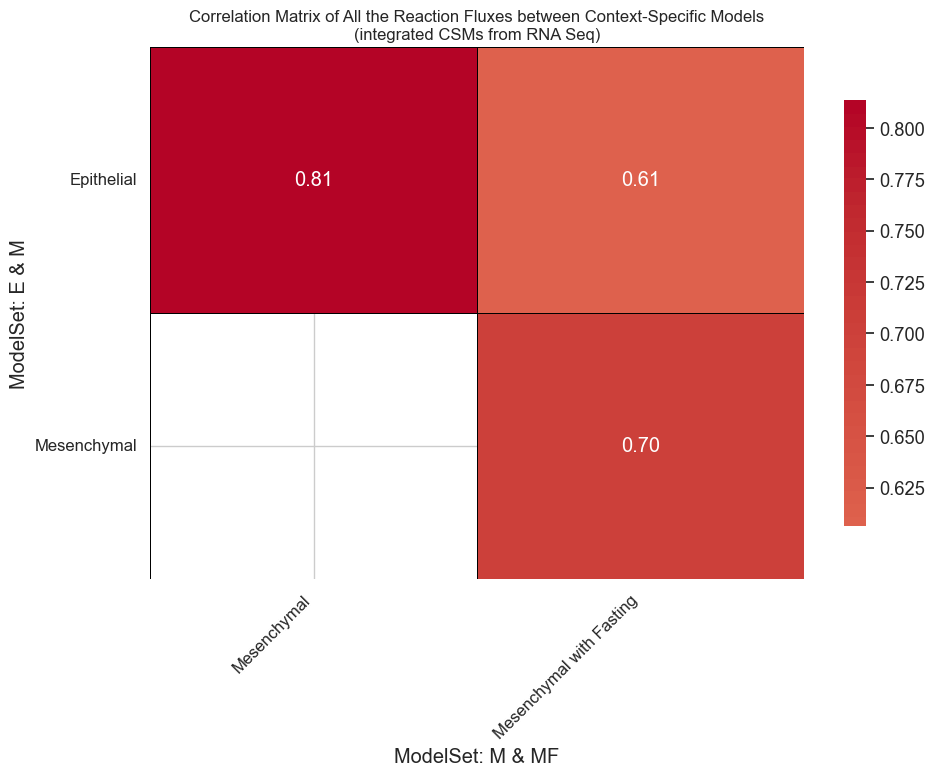

T-Statistics and P-Values:
  ModelSet: E & M          ModelSet: M & MF  T-Statistic   P-Value
0      Epithelial               Mesenchymal     1.035239  0.302729
1      Epithelial  Mesenchymal with Fasting     0.808953  0.420213
2     Mesenchymal  Mesenchymal with Fasting     0.068397  0.945588


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_rel

# Assuming your context-specific models are named as follows
context_specific_models = {
    "Epithelial": epithelial_csm.copy(),
    "Mesenchymal": mesenchymal_csm.copy(),
    "Mesenchymal with Fasting": mesenchymal_fasting_csm.copy(),
}


# Function to extract reaction fluxes
def get_reaction_fluxes(model):
    flux_data = {}
    for reaction in model.reactions:
        with model:
            solution = model.optimize()
            flux = solution.fluxes.get(reaction.id, 0)
            if (
                pd.notna(flux) and flux != 0
            ):  # Only consider non-NaN and non-zero fluxes
                flux_data[reaction.id] = flux
    return flux_data


# Extract fluxes from all context-specific models
flux_dfs = {}
for model_name, model in context_specific_models.items():
    flux_data = get_reaction_fluxes(model)
    flux_dfs[model_name] = pd.DataFrame.from_dict(
        flux_data, orient="index", columns=["Flux"]
    )

# Combine data into a single DataFrame
combined_fluxes = pd.concat(flux_dfs, axis=1)
combined_fluxes.columns = pd.MultiIndex.from_product(
    [context_specific_models.keys(), ["Flux"]]
)

# Drop rows with any NaN values
combined_fluxes = combined_fluxes.dropna()

# Calculate correlations and t-statistics
correlation_data = []

model_names = list(context_specific_models.keys())

for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1, model2 = model_names[i], model_names[j]
        flux1 = combined_fluxes[(model1, "Flux")]
        flux2 = combined_fluxes[(model2, "Flux")]
        corr, _ = pearsonr(flux1, flux2)
        t_stat, p_val = ttest_rel(flux1, flux2)
        correlation_data.append(
            {
                "ModelSet: E & M": model1,
                "ModelSet: M & MF": model2,
                "Correlation": corr,
                "T-Statistic": t_stat,
                "P-Value": p_val,
            }
        )

correlation_df = pd.DataFrame(correlation_data)

# Plotting correlation matrix with enhanced aesthetics
plt.figure(figsize=(10, 8))
pivot_corr = correlation_df.pivot(
    index="ModelSet: E & M", columns="ModelSet: M & MF", values="Correlation"
)

# Set up the plot with seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Heatmap with annotations for both correlation coefficients and p-values
heatmap = sns.heatmap(
    pivot_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="black",
)

# Adjusting the tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

plt.title(
    "Correlation Matrix of All the Reaction Fluxes between Context-Specific Models\n(integrated CSMs from RNA Seq)",
    fontsize=12,
)
plt.tight_layout()
plt.show()

# Display t-statistics
print("T-Statistics and P-Values:")
print(correlation_df[["ModelSet: E & M", "ModelSet: M & MF", "T-Statistic", "P-Value"]])

In [11]:
combined_fluxes.to_csv("combined_fluxes_E_M_MF.csv")

Now we study the single reaction deletion from each of the models. Here, one by one the reactions are 'switched off' from the models and then we plot the growth rate as a heatmap. Aka, Nutrient Depletion study.

In [46]:
single_reaction_del_mesenchymal_csm = single_reaction_deletion(mesenchymal_csm)
single_reaction_del_mesenchymal_csm

,ids,growth,status
0,{DNDPt20m},286.289997,optimal
1,{KAT180_m},286.289997,optimal
2,{AKGCITtm},286.289997,optimal
3,{UAGDP},286.289997,optimal
4,{HCO3Em},286.289997,optimal
...,...,...,...
1652,{GLYCK},286.289997,optimal
1653,{ILEASNHISr},286.289997,optimal
1654,{NTD5m},286.289997,optimal
1655,{SSALxm},286.289997,optimal


In [48]:
single_reaction_del_mesenchymal_csm.to_csv("single_reaction_del_mesenchymal_csm.csv")

In [168]:
combined_data.to_csv('combinedd_data.csv', index=False)

We proceed by checking for the number of common reactions in the models. As they will differ since they are context specific. 

In [204]:
# Extract reaction IDs from each model
epithelial_reaction_ids = set([reaction.id for reaction in epithelial_model.reactions])
mesenchymal_reaction_ids = set([reaction.id for reaction in mesenchymal_model.reactions])
fasting_reaction_ids = set([reaction.id for reaction in fasting_model.reactions])

# Find the common reaction IDs between the three models
common_reaction_ids = epithelial_reaction_ids & mesenchymal_reaction_ids & fasting_reaction_ids

# Convert the set to a sorted list for better readability
common_reaction_ids = sorted(common_reaction_ids)

# Output the common reaction IDs
print(len(common_reaction_ids), "Common Reaction IDs")


630 Common Reaction IDs


While plotting the single reaction deletion data, We ensure to study the amino acids with highest priority. And all other reactions followed by that. 

Common amino acids among the models:
L-Glutamine exchange
L-Phenylalanine exchange
L-Serine exchange


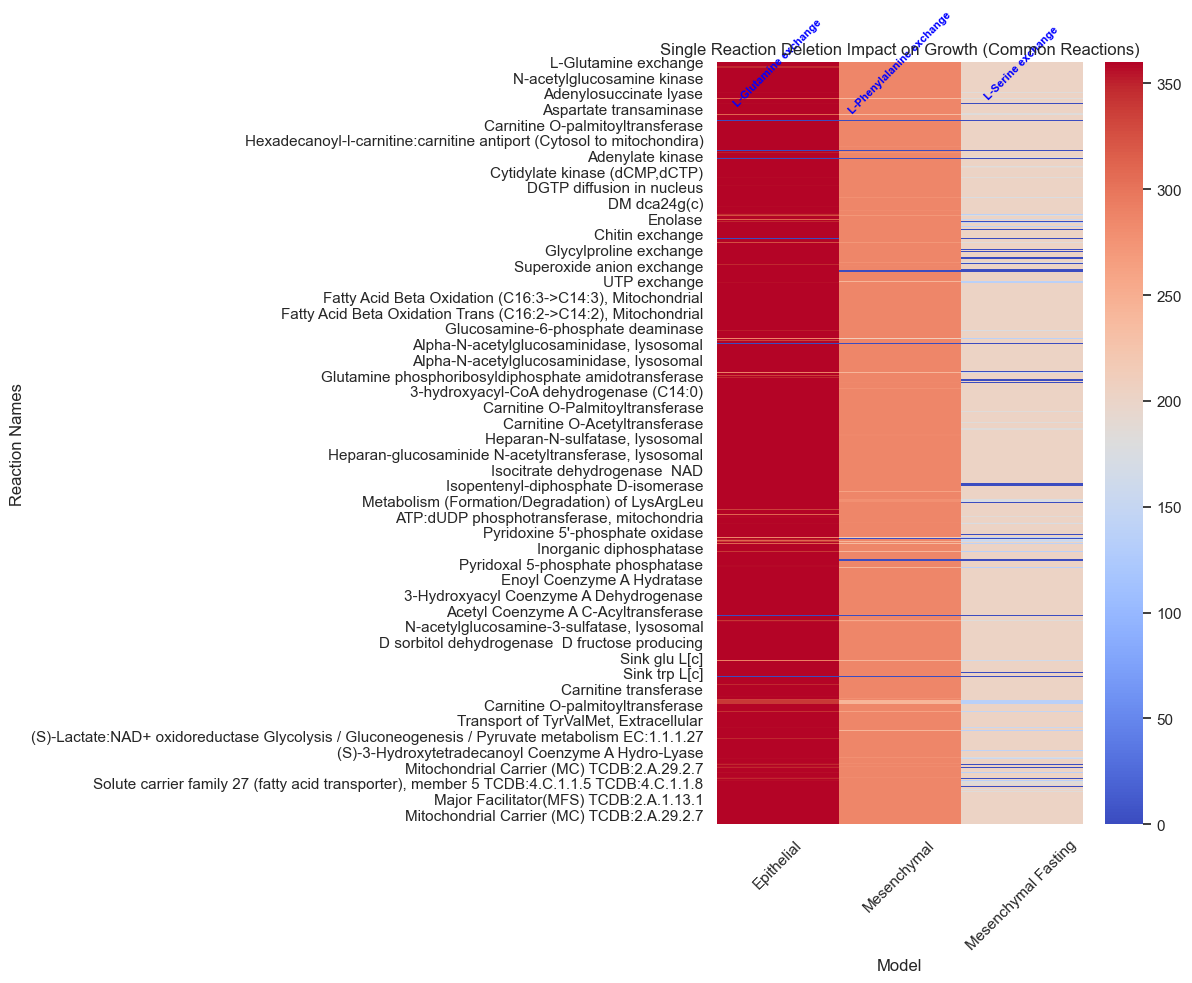

In [212]:
# Extract reaction IDs and names from each model
def get_reaction_id_name_dict(model):
    return {reaction.id: reaction.name for reaction in model.reactions}

epithelial_reactions = get_reaction_id_name_dict(epithelial_model)
mesenchymal_reactions = get_reaction_id_name_dict(mesenchymal_model)
fasting_reactions = get_reaction_id_name_dict(fasting_model)

# List of prioritized reaction IDs
prioritized_reaction_ids = [
    "EX_ala__L_e",
    "EX_arg__L_e",
    "EX_asn__L_e",
    "EX_asp__L_e",
    "EX_cys__L_e",
    "EX_gln__L_e",
    "EX_glu__L_e",
    "EX_gly_e",
    "EX_his__L_e",
    "EX_ile__L_e",
    "EX_leu__L_e",
    "EX_lys__L_e",
    "EX_met__L_e",
    "EX_phe__L_e",
    "EX_pro__L_e",
    "EX_ser__L_e",
    "EX_thr__L_e",
    "EX_trp__L_e",
    "EX_tyr__L_e",
    "EX_val__L_e",
]

# Filter prioritized reactions common to all models
common_prioritized_ids = [rid for rid in prioritized_reaction_ids if rid in epithelial_reactions and rid in mesenchymal_reactions and rid in fasting_reactions]

print("Common amino acids among the models:")
for rxn_id in common_prioritized_ids:
    print(fasting_model.reactions.get_by_id(rxn_id).name)
    
# Find other common reaction IDs
common_reaction_ids = sorted(set(epithelial_reactions) & set(mesenchymal_reactions) & set(fasting_reactions) - set(common_prioritized_ids))

# Combine the two lists
ordered_reaction_ids = common_prioritized_ids + common_reaction_ids

# Run single reaction deletions
epithelial_deletion_results = single_reaction_deletion(epithelial_model, reaction_list=ordered_reaction_ids)
mesenchymal_deletion_results = single_reaction_deletion(mesenchymal_model, reaction_list=ordered_reaction_ids)
fasting_deletion_results = single_reaction_deletion(fasting_model, reaction_list=ordered_reaction_ids)

# Convert results to DataFrames and include reaction names
def convert_ids_to_str(df):
    df['ids'] = df['ids'].apply(lambda x: list(x)[0])  # Convert set to string by taking the first element
    return df

epithelial_df = convert_ids_to_str(pd.DataFrame(epithelial_deletion_results))
mesenchymal_df = convert_ids_to_str(pd.DataFrame(mesenchymal_deletion_results))
fasting_df = convert_ids_to_str(pd.DataFrame(fasting_deletion_results))

# Add reaction names
epithelial_df['name'] = epithelial_df['ids'].map(epithelial_reactions)
mesenchymal_df['name'] = mesenchymal_df['ids'].map(mesenchymal_reactions)
fasting_df['name'] = fasting_df['ids'].map(fasting_reactions)

# Reorder DataFrames by `ordered_reaction_ids`
epithelial_df = epithelial_df.set_index('name').loc[[epithelial_reactions[id] for id in ordered_reaction_ids], ['growth']]
mesenchymal_df = mesenchymal_df.set_index('name').loc[[mesenchymal_reactions[id] for id in ordered_reaction_ids], ['growth']]
fasting_df = fasting_df.set_index('name').loc[[fasting_reactions[id] for id in ordered_reaction_ids], ['growth']]

# Rename the growth columns
epithelial_df.columns = ['Epithelial CSM']
mesenchymal_df.columns = ['Mesenchymal CSM']
fasting_df.columns = ['Mesenchymal Fasting Integrated CSM']

# Combine the DataFrames
combined_data = pd.concat([epithelial_df, mesenchymal_df, fasting_df], axis=1)

# Drop rows with any missing values to ensure all reactions are common
combined_data.dropna(inplace=True)

# Set seaborn theme
sns.set_theme()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(combined_data, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)

# Annotate common amino acids at the top of the heatmap
for i, rxn_id in enumerate(common_prioritized_ids):
    plt.text(i + 0.5, -0.5, fasting_model.reactions.get_by_id(rxn_id).name, ha='center', va='center', rotation=45, fontsize=8, fontweight='bold', color='blue')

# Set labels and ticks
plt.title('Single Reaction Deletion Impact on Growth (Common Reactions)')
plt.xlabel('Model')
plt.ylabel('Reaction Names')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Epithelial', 'Mesenchymal', 'Mesenchymal Fasting'], rotation=45)
plt.tight_layout()
plt.show()


Hence the above plot shows how switching off each of the reactions listed on y axis, affects the overall Growth rate. i,e the Biomass reaction